Mean Squared Error: 1.770760353111212e-05
R-squared: 0.9787593191270124


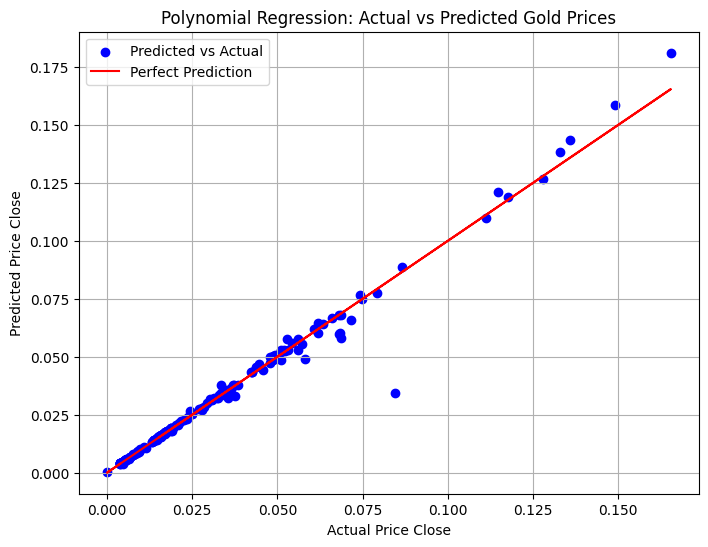

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv(r'E:\github\data science\data-science\Machine Learning\Gold_price_2025 new.csv')

cols_to_clean = ['priceOpen', 'priceHigh', 'priceLow', 'priceClose', 'volume']
for col in cols_to_clean:
    df[col] = df[col].astype(str).str.replace(",", ".").astype(float)
x=df[['priceOpen', 'priceHigh', 'priceLow', 'volume']]
y=df['priceClose']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')  # diagonal line
plt.xlabel('Actual Price Close')
plt.ylabel('Predicted Price Close')
plt.title('Polynomial Regression: Actual vs Predicted Gold Prices')
plt.legend()
plt.grid(True)
plt.show()